======================================================================================================

**Disclaimer**: Parts of this notebook are adapted from this [**GitHub repo**](https://github.com/DeepRLCourse/Workshop-1-Material/blob/master/Workshop1_Notebook.ipynb)  with minor modifications. Credit to the original authors.

======================================================================================================

# Workshop 1. Introduction to Reinforcement Learning
Welcome to this workshop on **Reinforcement Learning (RL)**! This notebook will help you learn core RL concepts and tools interactively by running code cells. Let's get started!

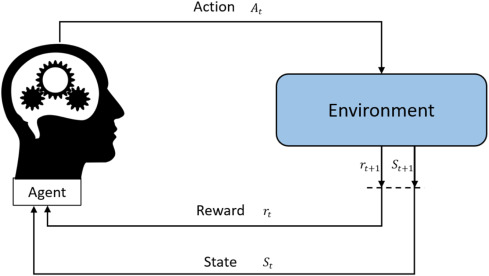

##**Markov Decision Process (MDP)**

A **Markov Decision Process (MDP)** is a mathematical framework for modeling decision-making where outcomes are partly random and partly controlled by an agent.

### **Components of an MDP**
- **States (S)**: The set of possible situations the agent can be in.
- **Actions (A)**: The set of possible actions the agent can take.
- **Transition Function (T)**: Defines the probability of moving from one state to another given an action.
- **Reward Function (R)**: Provides feedback on how good or bad an action was.





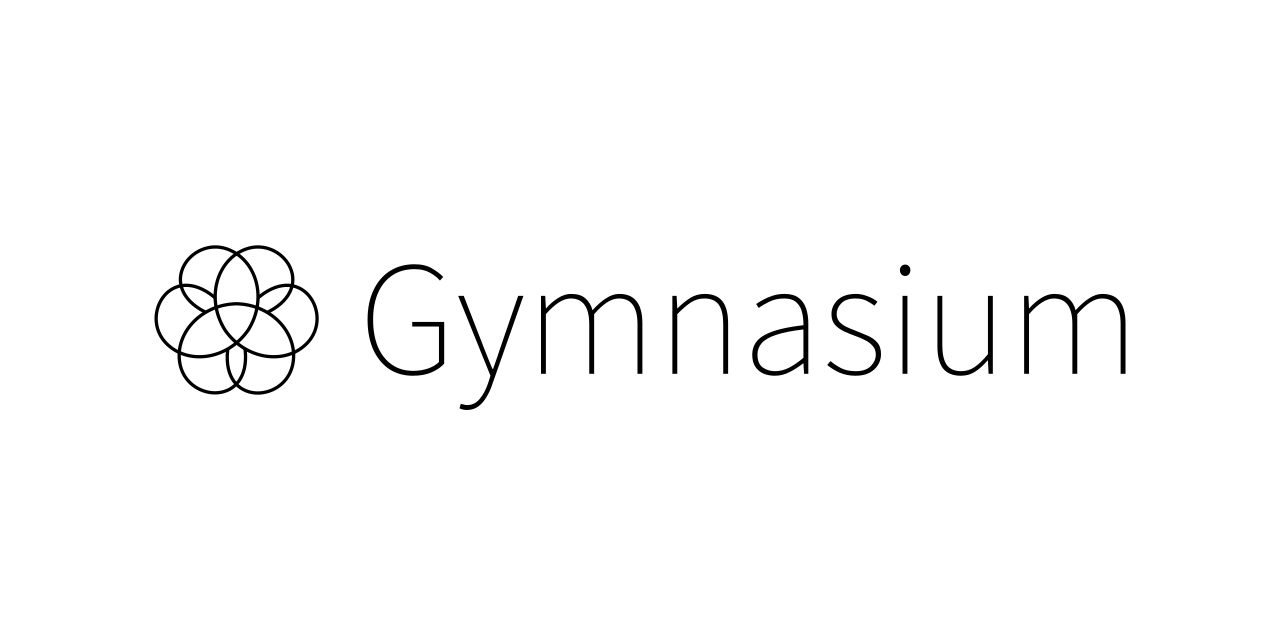

### **Gymnasium**

**Gymnasium** is an open-source toolkit for developing and testing **Reinforcement Learning (RL)** algorithms. It provides a **standardized interface** for RL environments, making it easy to create, modify, and benchmark RL agents. Gymnasium was developed as the successor to OpenAI’s **Gym**, improving compatibility, long-term maintenance, and community support.

### **Key Features of Gymnasium**
- **Variety of Environments**: It includes classic control problems, Atari games, robotic simulations, and more.
- **Standardized API**: Every environment follows a consistent structure using `env.reset()` and `env.step(action)`.
- **Support for Wrappers**: Allows modifications such as observation normalization and reward shaping.
- **Integration with RL Libraries**: Works seamlessly with libraries like [**Stable-Baselines3**](https://stable-baselines3.readthedocs.io/en/master/), [**RLlib**](https://docs.ray.io/en/latest/rllib/index.html), and [**CleanRL**](https://github.com/vwxyzjn/cleanrl).

Gymnasium is widely used in **both research and industry**, helping develop **autonomous agents** for tasks like **robotics, gaming, and finance**. To explore more environments, check out the official documentation: [https://gymnasium.farama.org](https://gymnasium.farama.org).



### **MDP in Gymnasium**
In **Gymnasium**, environments follow the MDP framework:
- `env.observation_space`: Represents the **state space (S)**.
- `env.action_space`: Represents the **action space (A)**.
- `env.step(action)`: Defines the **transition (T)** and provides the **reward (R)**.
- `env.reset()`: Resets the environment to an initial state.

So now let's start by installing dependencies:

In [ ]:
!apt-get install x11-utils > /dev/null 2>&1
!pip install pyglet > /dev/null 2>&1
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

!pip install pyvirtualdisplay > /dev/null 2>&1
!pip install swig > /dev/null 2>&1
!pip install "gymnasium[all]" pygame matplotlib numpy pandas > /dev/null 2>&1

## 1. Creating an Environment from Scratch
Let's create a simple custom RL environment without using any external library.

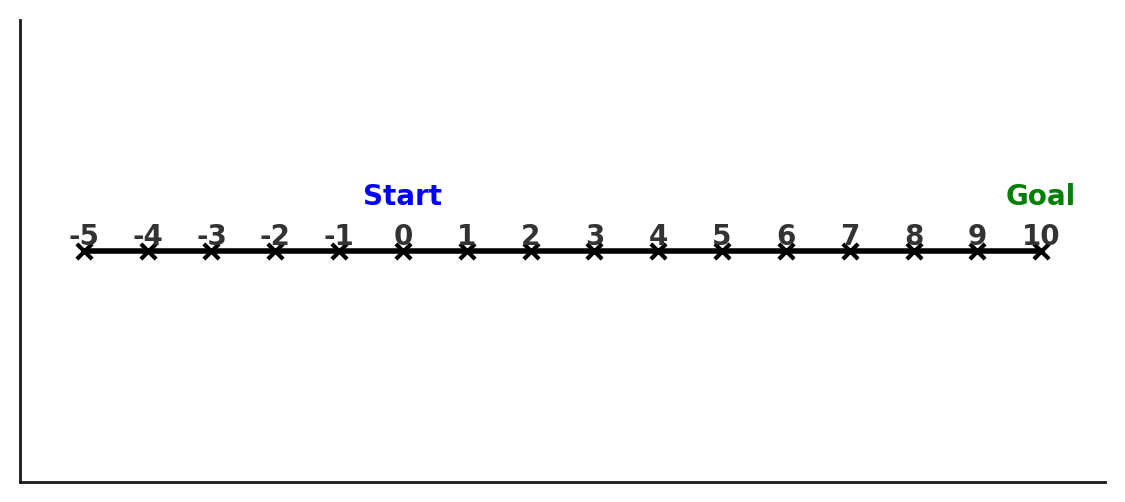

In [ ]:

import numpy as np

class SimpleEnv:
    def __init__(self):
        self.timestep = 0
        self.state = 0   # initial state
        self.goal = 10  # target state

    def step(self, action):
        """Apply an action (1 or -1) to change state."""

        #moving one timestep forward
        self.timestep += 1
        print(f"current timestep: {self.timestep} , current action:{action}")
        self.state += action
        reward = 100 if self.state == self.goal else -1  # reward if goal reached
        done = self.state == self.goal
        return self.state, reward, done

    def reset(self):
        """Reset the environment."""
        self.state = 0
        return self.state

# Example Usage
env = SimpleEnv()
state = env.reset()

total_timestep = 15
for _ in range(total_timestep):
    action = np.random.choice([-1, 1])  # random action
    next_state, reward, done = env.step(action)
    print(f"State: {next_state}, Reward: {reward}, Done: {done} \n")
    if done or env.timestep == total_timestep:
        print("Episode Finished or truncated!")
        break


current timestep: 1 , current action:1
State: 1, Reward: -1, Done: False 

current timestep: 2 , current action:1
State: 2, Reward: -1, Done: False 

current timestep: 3 , current action:-1
State: 1, Reward: -1, Done: False 

current timestep: 4 , current action:1
State: 2, Reward: -1, Done: False 

current timestep: 5 , current action:-1
State: 1, Reward: -1, Done: False 

current timestep: 6 , current action:1
State: 2, Reward: -1, Done: False 

current timestep: 7 , current action:1
State: 3, Reward: -1, Done: False 

current timestep: 8 , current action:-1
State: 2, Reward: -1, Done: False 

current timestep: 9 , current action:-1
State: 1, Reward: -1, Done: False 

current timestep: 10 , current action:-1
State: 0, Reward: -1, Done: False 

current timestep: 11 , current action:1
State: 1, Reward: -1, Done: False 

current timestep: 12 , current action:-1
State: 0, Reward: -1, Done: False 

current timestep: 13 , current action:-1
State: -1, Reward: -1, Done: False 

current times

## 2. Using Gymnasium
After implementing the env (which is pretty similar to standard libraries implementations!) We will explore **Gymnasium**, a standard library for RL environments.

In [ ]:
from gymnasium import envs

all_envs = envs.registry
env_ids = [env_spec  for env_spec in all_envs]
print("Gymnasium envs listed:",sorted(env_ids))

Gymnasium envs listed: ['Acrobot-v1', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'Ant-v5', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'Blackjack-v1', 'CarRacing-v3', 'CartPole-v0', 'CartPole-v1', 'CliffWalking-v0', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'GymV21Environment-v0', 'GymV26Environment-v0', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'HalfCheetah-v5', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Hopper-v5', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'Humanoid-v5', 'HumanoidStandup-v2', 'HumanoidStandup-v4', 'HumanoidStandup-v5', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'InvertedDoublePendulum-v5', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'InvertedPendulum-v5', 'LunarLander-v3', 'LunarLanderContinuous-v3', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Pusher-v2', 'Pusher-v4', 'Pusher-v5', 'Reacher-v2', 'Reacher-v4', 'Reacher-v5', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Swimmer-v5', 'Taxi-v3', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4', 'W

In [ ]:
import gymnasium as gym

# Create a simple environment
env = gym.make('phys2d/Pendulum-v0')

# reset the environment
state, info = env.reset()

# run a few steps
for _ in range(10):
    action = env.action_space.sample()  # random action
    next_state, reward, done, truncated, info = env.step(action)
    print(f"State: {next_state},  Reward: {reward}, Done: {done}")
    if done:
        break

env.close()

State: [ 0.9999612  -0.0088093   0.24107254],  Reward: -0.004353062715381384, Done: False
State: [0.99989796 0.01428475 0.4618929 ],  Reward: -0.008188009262084961, Done: False
State: [0.99948627 0.03204978 0.3554007 ],  Reward: -0.022149117663502693, Done: False
State: [0.99896485 0.0454885  0.26897866],  Reward: -0.014200793579220772, Done: False
State: [0.9977555 0.066962  0.4301589],  Reward: -0.010023140348494053, Done: False
State: [0.99708337 0.07632007 0.1876442 ],  Reward: -0.02680293098092079, Done: False
State: [0.99681705 0.07972314 0.06826948],  Reward: -0.010743471793830395, Done: False
State: [0.9955984  0.09372263 0.28105107],  Reward: -0.007875604555010796, Done: False
State: [0.99202156 0.12606834 0.6508861 ],  Reward: -0.020696567371487617, Done: False
State: [0.98711836 0.15999153 0.68554777],  Reward: -0.05850284919142723, Done: False


In cell above we used [Pendulum](https://gymnasium.farama.org/environments/classic_control/pendulum/) environment.

## 3. Visualize Environment in Google Colab

In [ ]:
# Install necessary packages
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install pyvirtualdisplay moviepy > /dev/null 2>&1

In [ ]:
from moviepy.editor import ImageSequenceClip
from IPython.display import HTML
from base64 import b64encode

def display_video_from_frames(frames, fps=30, video_filename="lunar_lander.mp4", width=700):
    """
    Converts a list of frames into a video and displays it within a Jupyter Notebook or Google Colab.

    Parameters:
    - frames: List of frames (numpy arrays) to be compiled into a video.
    - fps: Frames per second for the output video.
    - video_filename: Name of the output video file.
    - width: Width of the displayed video in pixels.

    Returns:
    - An IPython.display.HTML object that embeds the video.
    """
    # Create video clip
    clip = ImageSequenceClip(frames, fps=fps)

    # Write the video to a file
    clip.write_videofile(video_filename, codec="libx264")

    # Read the video file and encode it to base64
    with open(video_filename, 'rb') as f:
        video_data = f.read()
    data_url = "data:video/mp4;base64," + b64encode(video_data).decode()

    # Return the HTML object to display the video
    return HTML(f"""
    <video width={width} controls>
        <source src="{data_url}" type="video/mp4">
    </video>
    """)


  if event.key is 'enter':



In [ ]:
# Create the environment with rendering mode set to 'rgb_array'
env = gym.make("LunarLander-v3", render_mode="rgb_array")
frames = []

# Reset the environment
state, info = env.reset()
done = False
truncated = False

# Run the environment with random actions and capture frames
while not (done or truncated):
    frames.append(env.render())
    action = env.action_space.sample()
    state, reward, done, truncated, info = env.step(action)

env.close()

display_video_from_frames(frames)



NameError: name 'display_video_from_frames' is not defined

## 4. Types of Environments and Actions in Gymnasium
Gymnasium has various environments, and actions can be discrete or continuous.



In **Gymnasium**, each environment defines:
- **Action Space**: The set of valid actions an agent can take.
- **Observation Space**: The representation of the environment state.
- **Reward Structure**: The feedback the agent receives after taking an action.

### **1. Action Space**
Gymnasium supports two main types of action spaces:
- **Discrete Actions**: A finite set of possible actions.
  - Example: `Discrete(3)` means three possible actions: `{0, 1, 2}`.
- **Continuous Actions**: Actions are real-valued numbers within a range.
  - Example: `Box(low=-1.0, high=1.0, shape=(1,))` allows actions in the range `[-1, 1]`.

### **2. Observation Space**
- **Discrete Observations**: The state is represented by a limited number of values.
- **Continuous Observations**: The state is represented as a set of floating-point numbers.

Composite Spaces also are available.

### **3. Reward Structure**
Rewards can be:
- **Dense**: The agent receives a reward frequently (e.g., every step).
- **Sparse**: The agent receives a reward only on special occasions (e.g., when reaching a goal).


In [ ]:
import gymnasium as gym

# Choose an environment
env = gym.make("LunarLander-v3")

# Display action space
print(f"Action Space Type: {type(env.action_space)}")
print(f"Action Space: {env.action_space}")

# Display observation space
print(f"\nObservation Space Type: {type(env.observation_space)}")
print(f"Observation Space: {env.observation_space}")

# Reset environment
state, info = env.reset()

# Take a random action
action = env.action_space.sample()
next_state, reward, done, truncated, info = env.step(action)

# Display step results
print("\nExample Step Results:")
print(f"Action Taken: {action}")
print(f"New State: {next_state}")
print(f"Reward Received: {reward}")
print(f"Episode Done: {done}")

env.close()


Action Space Type: <class 'gymnasium.spaces.discrete.Discrete'>
Action Space: Discrete(4)

Observation Space Type: <class 'gymnasium.spaces.box.Box'>
Observation Space: Box([ -2.5        -2.5       -10.        -10.         -6.2831855 -10.
  -0.         -0.       ], [ 2.5        2.5       10.        10.         6.2831855 10.
  1.         1.       ], (8,), float32)

Example Step Results:
Action Taken: 1
New State: [-0.00232429  1.4248283  -0.12369271  0.29611272  0.00463941  0.06667908
  0.          0.        ]
Reward Received: 1.0250805344327045
Episode Done: False


## 5. Creating a Custom Gymnasium Environment
Let's create a **custom Gymnasium environment** by subclassing `gym.Env`.

In [ ]:

import gymnasium as gym
from gymnasium import spaces
import numpy as np

class CustomEnv(gym.Env):
    def __init__(self):
        super().__init__()
        self.observation_space = spaces.Discrete(5)
        self.action_space = spaces.Discrete(2)

    def step(self, action):
        reward = 1 if action == 1 else -1  # Simple reward system
        done = np.random.rand() < 0.2  # randomly ends episode
        return np.random.randint(0, 5), reward, done, False, {}

    def reset(self, seed=None, options=None):
        return np.random.randint(0, 5), {}

env = CustomEnv()
state, _ = env.reset()
for _ in range(5):
    action = env.action_space.sample()
    next_state, reward, done, _, _ = env.step(action)
    print(f"State: {next_state}, Reward: {reward}, Done: {done}")
    if done:
        break


State: 4, Reward: 1, Done: False
State: 4, Reward: -1, Done: True


## Render function

We also have render function to display the env which has different types:

1. `render_mode="human"` :
Displays the environment in a window

2. `render_mode="rgb_array"`:
	Returns an array of pixel values (image frame)


In [ ]:
env = gym.make("LunarLander-v2", render_mode="human")

## 6. Wrappers in Gymnasium

**Wrappers** in Gymnasium are used to modify environments **without changing their underlying logic**. they allow us to:
- **Transform Observations**: Modify how observations are presented to the agent.
- **Modify Rewards**: Change the reward structure for better learning.
- **Preprocess Actions**: Modify actions before they are applied.
- **Apply Multiple Modifications**: Stack different wrappers together.

### **Types of Wrappers**
1. **ObservationWrapper**: Modifies the observations returned by `env.step()`.
2. **RewardWrapper**: Changes the rewards received by the agent.
3. **ActionWrapper**: Transforms agent actions before applying them.
4. **EnvWrapper**: A general-purpose wrapper that allows more complex modifications.

Wrappers are powerful because they allow **custom preprocessing** without modifying the original environment. See the [link](https://gymnasium.farama.org/api/wrappers/) for details. Here we implement three type of wrappers:


In [ ]:
import numpy as np
from gymnasium import ObservationWrapper, RewardWrapper, ActionWrapper

# Create a base environment
env = gym.make("CartPole-v1")

# 1. Observation Wrapper (Normalize Observations)
class NormalizedObservation(ObservationWrapper):
    def observation(self, obs):
        return obs / np.linalg.norm(obs)  # Normalize the state vector

# 2. Reward Wrapper (Modify Rewards)
class ScaledReward(RewardWrapper):
    def reward(self, reward):
        return reward * 2  # Double the reward

# 3. Action Wrapper (Invert Actions)
class InvertedAction(ActionWrapper):
    def action(self, action):
        return 1 - action  # Invert binary actions (0 ↔ 1)

# Apply Wrappers
env = NormalizedObservation(env)
env = ScaledReward(env)
env = InvertedAction(env)

# Reset and take a step
state, info = env.reset()
action = env.action_space.sample()
next_state, reward, done, truncated, info = env.step(action)

# Print results
print("Modified Observation:", next_state)
print("Modified Reward:", reward)
print("Modified Action:", action)

Modified Observation: [-0.06012927  0.69709754  0.12296471 -0.7037891 ]
Modified Reward: 2.0
Modified Action: 0
